# Text Generation with Recurrent Neural Networks (RNNs)

In this assignment, you'll build upon your understanding of RNNs and Keras to develop a word-level text generation model.  Your goal is to train a model that learns the stylistic nuances of a chosen corpus and generates new, original text segments that echo the source material's essence.

**Datasets**

We've provided several intriguing text corpora to get you started:

*   Mark Twain
*   Charles Dickens
*   William Shakespeare

**Feel free to explore!**  If you have a particular passion for another author, genre, or a specific text, you're encouraged to use your own dataset of raw text.

In [ ]:
# Check if we have a GPU available
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.")

In [1]:
# def download_file(url, file_path):
#     import requests
#     r = requests.get(url)
#     with open(file_path, 'wb') as f:
#         f.write(r.content)

def load_dataset(file_path, fraction=1.0):
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()
    return raw_text[:int(fraction * len(raw_text))]

# dataset = 'shakespeare.txt' # Other options are mark_twain.txt, charles_dickens.txt

# download_file(f'https://github.com/UofT-DSI/deep_learning/raw/main/assignments/downloaded_books/' + dataset, dataset)

# Load chosen dataset. NOTE: If Colab is running out of memory, change the `fraction` parameter to a value between 0 and 1 to load less data.
text = load_dataset(r'C:\Users\arezo\DSI_Assignments\deep_learning\deep_learning\02_activities\assignments\downloaded_books\shakespeare.txt')

# 1. Data Preparation (Complete or Incomplete)

Before we can begin training an RNN model, we need to prepare the dataset. This involves cleaning the text, tokenizing words, and creating sequences the model can be trained on.

## 1.1 Data Exploration

Print the first 1000 characters of the dataset. Report the dataset's size and the number of unique characters it contains.

In [2]:
print("First 1000 characters of the dataset:")
print(text[:1000])

First 1000 characters of the dataset:
The Project Gutenberg EBook of Hamlet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Hamlet

Author: William Shakespeare

Editor: Charles Kean

Release Date: January 10, 2009 [EBook #27761]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK HAMLET ***




Produced by David Starner, Curtis Weyant and the Online
Distributed Proofreading Team at https://www.pgdp.net









    Transcriber's Note:
    This is a heavily edited version of _Hamlet_. It was used
    for Charles Kean's 1859 stage production. Phrases printed
    in italics in the book are indicated in this electronic
    version by _ (underscore). Footnotes originally appeared
    at the bottom of each page. For this

In [3]:
# Dataset size
print ('Dataset_size:', len(text))

Dataset_size: 9358862


In [4]:
# Number of unique characters
unique_characters = set(text)
num_unique_characters = len(unique_characters)
print('num_unique_characters:', num_unique_characters)

num_unique_characters: 192


## 1.2 Text Pre-Processing

To prepare the dataset for training, we need to clean the text and create a numerical representation the model can interpret. Perform the following pre-processing steps:

*   Convert the entire text to lowercase.
*   Use the `Tokenizer` class from the `keras.preprocessing.text` module to tokenize the text. You should fit the tokenizer on the text and then convert the text to a sequence of numbers. You can use the `texts_to_sequences` method to do this.

**Note**:
* You'll need to specify an appropriate size for the vocabulary. The number of words in the list of most common words can serve as a guide - does it seem like a reasonable vocabulary size?
* Some of the words will be excluded from the vocabulary, as they don't appear often enough. It's important to provide a value for `oov_token` when creating the Tokenizer instance, so that these words can be represented as "unknown".

First 1000 characters of the dataset:
The Project Gutenberg EBook of Hamlet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Hamlet

Author: William Shakespeare

Editor: Charles Kean

Release Date: January 10, 2009 [EBook #27761]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK HAMLET ***




Produced by David Starner, Curtis Weyant and the Online
Distributed Proofreading Team at https://www.pgdp.net









    Transcriber's Note:
    This is a heavily edited version of _Hamlet_. It was used
    for Charles Kean's 1859 stage production. Phrases printed
    in italics in the book are indicated in this electronic
    version by _ (underscore). Footnotes originally appeared
    at the bottom of each page. For this

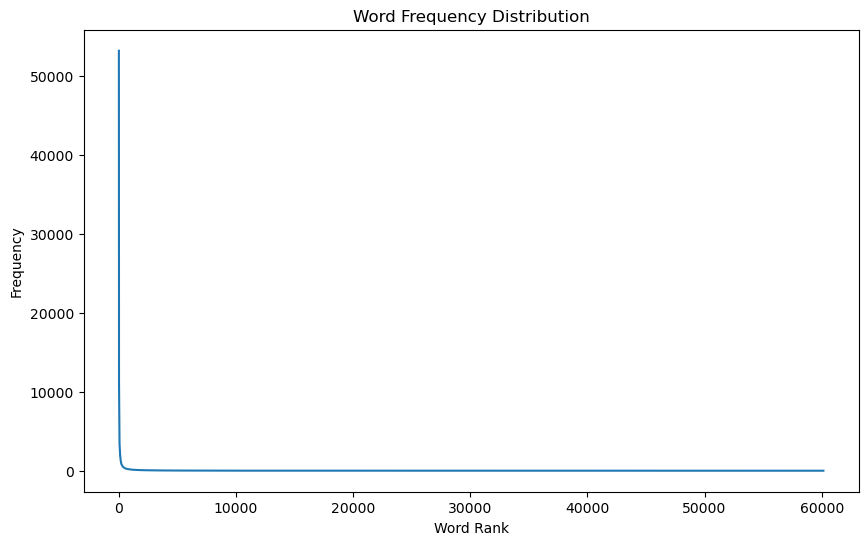

Total unique words: 60148
Words covering 80% of the text: 2244
Suggested Vocabulary Size: 2244


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import numpy as np

# Fit the tokenizer on the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])  # Tokenize the given text

# Get the word counts
word_counts = tokenizer.word_counts

# Check if word counts are available
if not word_counts:
    print("No words found. Please check the input text.")
else:
    # Sort the word counts in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # Extract word frequencies
    frequencies = [count for _, count in sorted_word_counts]

    # Print first 1000 characters of the dataset
    print("First 1000 characters of the dataset:")
    print(text[:1000])

    # Plot the word frequency distribution
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies)
    plt.title('Word Frequency Distribution')
    plt.xlabel('Word Rank')
    plt.ylabel('Frequency')
    plt.show()

    # Analyze the distribution
    total_words = len(word_counts)  # Total unique words
    print(f"Total unique words: {total_words}")

    # Check the number of words covering 80% of the dataset
    cumulative_frequencies = np.cumsum(frequencies)
    if len(cumulative_frequencies) > 0:
        coverage_80 = np.argmax(cumulative_frequencies >= 0.8 * cumulative_frequencies[-1]) + 1
        print(f"Words covering 80% of the text: {coverage_80}")

        # Suggested vocabulary size
        VOCAB_SIZE = min(coverage_80, 10000)  # Cap at 10,000 for computational reasons
        print(f"Suggested Vocabulary Size: {VOCAB_SIZE}")
    else:
        print("No valid frequencies to analyze.")


In [6]:
# Convert the entire text to lowercase
text = text.lower()

# Initialize Tokenizer 
VOCAB_SIZE = 2244  
OOV_TOKEN = "<OOV>"                     # Out-Of-Vocabulary token for thodse are not included in the tokenizer's vocabulary
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)

# Fit tokenizer on the text dataset
tokenizer.fit_on_texts([text])

# Convert the text to sequences of numbers
sequences = tokenizer.texts_to_sequences([text])

If everything worked, the following line should show you the first 10 words in the vocabulary:

In [7]:
try:
    print(list(tokenizer.word_index.items())[:10])
except AttributeError:
    print("Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it."
)

[('<OOV>', 1), ('the', 2), ('and', 3), ('of', 4), ('to', 5), ('in', 6), ('i', 7), ('a', 8), ('you', 9), ('that', 10)]


## 1.3 Sequence Generation

Now that the text has been tokenized, we need to create sequences the model can be trained on. There are two parts to this:

*   Use the `texts_to_sequences` method from the tokenizer to convert the text to a list of sequences of numbers.
*   Generate the training sequences. Each training sequence should contain `SEQ_LENGTH` token IDs from the text. The target token for each sequence should be the word that follows the sequence in the text.

In [8]:
SEQ_LENGTH = 10            # Choose an appropriate sequence length

# Convert the text to a list of sequences of numbers
sequences = tokenizer.texts_to_sequences([text])[0]               # as we are working with 1 text

# Generate the training sequences
X = []
y = []

for i in range(SEQ_LENGTH, len(sequences)):
    seq_input = sequences [i-SEQ_LENGTH:i]          # Input sequence (SEQ_LENGTH tokens)
    seq_output = sequences [i]                      # Output token (the next word after the sequence)

    X.append(seq_input)
    y.append(seq_output)

Assuming your sequences are stored in `X` and the corresponding targets in `y`, the following line should print the first training sequence and its target:

In [9]:
if len(X) > 0 and len(y) > 0:
    print(f'Sequence: {X[0]}\nTarget: {y[0]}')
    print(f'Translated back to words: {[tokenizer.index_word[i] for i in X[0]]} -> {tokenizer.index_word[y[0]]}')
else:
    print("Training sequences have not been generated. Possible issue: Complete the relevant section of the assignment to initialize it.")


Sequence: [2, 138, 130, 784, 4, 267, 28, 666, 358, 21]
Target: 784
Translated back to words: ['the', 'project', 'gutenberg', 'ebook', 'of', 'hamlet', 'by', 'william', 'shakespeare', 'this'] -> ebook


And the following code will transform y into a one-hot encoded matrix, and split everything into training and validation sets:

In [10]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Ensure that tokenizer has been initialized
if tokenizer is not None:
    # Convert X and y to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # One last thing: let's drop any examples where the target is the OOV token - we don't want our model to predict that (boring!)
    if OOV_TOKEN in tokenizer.word_index:
        mask = y != tokenizer.word_index[OOV_TOKEN]
        X = X[mask]
        y = y[mask]

    # One-hot encode the target token
    y = to_categorical(y, num_classes=VOCAB_SIZE)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')
else:
    print("Tokenizer has not been initialized. Please initialize it and load the vocabulary before continuing.")


X_train shape: (977066, 10)
y_train shape: (977066, 2244)


# 2. Model Development (Complete or Incomplete)

With the dataset prepared, it's time to develop the RNN model. You'll need to define the architecture of the model, compile it, and prepare it for training.

## 2.1 Model Architecture

Define the architecture of your RNN model. You can design it however you like, but there are a few features that it's important to include:

*   An embedding layer that learns a dense representation of the input tokens. You'll need to specify the input dimension (the size of the vocabulary) and the output dimension (the size of the dense representation). Remember, you can look at the documentation [here](https://keras.io/api/layers/core_layers/embedding/).
*   At least one recurrent layer. We have learned how to use LSTM layers in class, but you can use other types of recurrent layers if you prefer. You can find the documentation [here](https://keras.io/api/layers/recurrent_layers/lstm/).
*   A dense layer with a softmax activation function. This layer will output a probability distribution over the vocabulary, so that the model can make predictions about the next token.

In [11]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

EMBEDDING_DIM = 100

model = Sequential([
    Embedding(input_dim = VOCAB_SIZE, output_dim = EMBEDDING_DIM, input_length = SEQ_LENGTH, trainable = True),               # output_dim: defines the dimensionality of the dense vector representation
    LSTM(100, return_sequences=False),                                                                              # return_sequences: False (we only need the final output of the LSTM (for the next token prediction), not the sequence of outputs for each time step)
    Dense(VOCAB_SIZE, activation = 'softmax')
])

# Check if the model has layers before trying to print the summary
if len(model.layers) > 0:
    model.summary()
else:
    print("No layers have been added to the model. Please complete the assignment by adding the required layers.")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           224400    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 2244)              226644    
                                                                 
Total params: 531,444
Trainable params: 531,444
Non-trainable params: 0
_________________________________________________________________


## 2.2 Model Compilation

Compile the model with an appropriate loss function and optimizer. You might also want to track additional metrics, such as accuracy.

Give a short explanation of your choice of loss function and optimizer:

Categorical Cross-Entropy Loss: Since the model is predicting one of many possible tokens (classes), and it is penalized based on how far off its prediction is from the actual next word. 

Adam optimizer adjusts the learning rate for each parameter individually. It can perform well even when there are features with very different gradients, and it prevents overshooting or slow convergence

In [12]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## 2.3 Model Training

Train the model on the training data you've prepared.

* Train your model for 5 epochs with a batch size of 128. Use the validation data for validation.
* Store the training history in a variable called `history`.

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=128)

Epoch 1/5
7634/7634 [==============================] - 121s 16ms/step - loss: 5.4813 - accuracy: 0.1103 - val_loss: 5.0699 - val_accuracy: 0.1460
Epoch 2/5
7634/7634 [==============================] - 120s 16ms/step - loss: 4.9290 - accuracy: 0.1556 - val_loss: 4.8565 - val_accuracy: 0.1639
Epoch 3/5
7634/7634 [==============================] - 122s 16ms/step - loss: 4.7492 - accuracy: 0.1712 - val_loss: 4.7494 - val_accuracy: 0.1753
Epoch 4/5
7634/7634 [==============================] - 133s 17ms/step - loss: 4.6348 - accuracy: 0.1832 - val_loss: 4.6858 - val_accuracy: 0.1832
Epoch 5/5
7634/7634 [==============================] - 126s 17ms/step - loss: 4.5521 - accuracy: 0.1925 - val_loss: 4.6453 - val_accuracy: 0.1896


Plot the training history to visualize the model's learning progress. Your plot should include the training and validation loss.

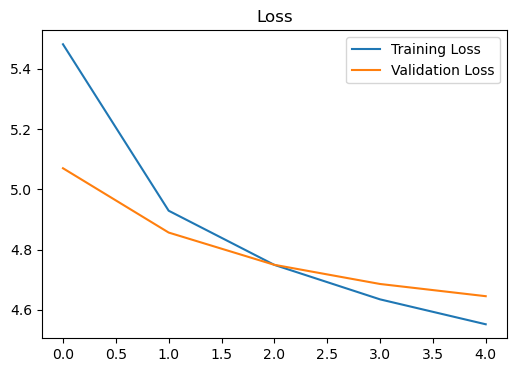

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# 3. Text Generation (Complete or Incomplete)

Write a method called `generate_text` that uses the trained model to generate new text. The method should take the following parameters:

*   `model`: The trained RNN model.
*   `tokenizer`: The tokenizer used to pre-process the text data.
*   `seed_text`: The seed text the model will use to generate new text.
*   `max_sequence_len`: The maximum length of the sequence used to generate new text.

The method should return the generated text.

An overview of the text generation process you should follow:

1. Tokenize the seed text using the tokenizer we built before.
2. Pad the sequences to the same length as the training sequences - you can use the `pad_sequences` method from the `keras.preprocessing.sequence` module, which is documented [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences).
3. Use the model to predict the next token in the sequence. Remember that the model will output a probability distribution over the vocabulary, so you'll need to use `np.argmax` to find the token with the highest probability.
4. Add the predicted token to the sequence and remove the first token.
5. Repeat steps 3-4 until you have generated the desired number of tokens.
6. Convert the generated token IDs back to words and return the combined result as a single string.

This is a challenging task, so don't hesitate to ask for help if you need it. It's okay if the generated text doesn't make much sense yet - we'll work on improving the model next.
As a bonus, you can make your method generate "gpt-style" by having it print out each word as it's generated, so you can see the text being generated in real time.

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_predicted_word(model, sequence):
    """
    Get the predicted word from the model.
    This helper function uses a concept we haven't covered in class yet: temperature.
    In essence, a little bit of randomness in what word we predict can make the text more interesting.
    """

    # Use the model to predict the next token in the sequence
    yhat = model.predict(sequence, verbose=0)

    # Get the index of the predicted word, according to the probabilities
    yhat = np.random.choice(range(VOCAB_SIZE), p=yhat.ravel())

    return yhat

def generate_text(model, tokenizer, seed_text, max_sequence_len):
    """
    Generate new text using the trained model.
    You can use the `get_predicted_word` helper function to help you with this.
    """
    
    generated_text = seed_text
    # Tokenize the seed text and pad the sequence to match the model's input shape
    tokenized_input = tokenizer.texts_to_sequences([seed_text])[0]
    tokenized_input = pad_sequences([tokenized_input], maxlen=max_sequence_len, padding='pre')

    num_words = 50

    for _ in range(num_words):
        # Get the predicted word using the model
        predicted_token = get_predicted_word(model, tokenized_input)

        # Convert the predicted token to a word
        predicted_word = tokenizer.index_word[predicted_token]

        # Append the predicted word to the generated text
        generated_text += ' ' + predicted_word

        # Update the sequence for the next prediction (add the predicted token and remove the first token)
        tokenized_input = np.roll(tokenized_input, shift=-1)
        tokenized_input[0, -1] = predicted_token

    return generated_text

In [16]:
# Test the text generation function
generate_text(model, tokenizer, 'hamlet', SEQ_LENGTH)

"hamlet by my different duty and that none almost ready by white as we have no man though he was such a man and had call'd a quiet humour and the first to be so if you wake him from him that they are cause of gold to you lie on"

It's likely that the text generated by your model doesn't make much sense yet. This is because the model hasn't been trained for very long, and the training dataset is relatively small. 

# 4. Model Refinement (Complete or Incomplete)

In this last section, you'll work on improving your model. There are many ways to do this, but here are a few ideas to get you started:

* Use pre-trained embeddings: the code below will help you to load pre-trained embeddings through Keras. 
* Experiment with different model architectures, including the number of layers, the number of units in each layer, and the use of dropout layers.
* Train your model for longer. You can also experiment with different batch sizes.

Implement and test out at least one of these ideas. If you have other ideas for improving the model, feel free to try them out as well.

In [17]:
# Load the pre-trained embeddings
embeddings_index = {}
try:
    with open(r'C:\Users\arezo\DSI_Assignments\deep_learning\deep_learning\02_activities\assignments\glove.6B\glove.6B.100d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f'Found {len(embeddings_index)} word vectors.')
except FileNotFoundError:
    print("'glove.6B.100d.txt' File not found. Please make sure you have ran the previous cell.")

Found 400000 word vectors.


In [18]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    # Create an embedding matrix
    embedding_matrix = np.zeros((VOCAB_SIZE, 100))
    for word, i in tokenizer.word_index.items():
        if i < VOCAB_SIZE:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

In [19]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    embedding_layer = Embedding(
        VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False
    )

In [20]:
from keras.layers import Dropout

# Define the model architecture
model = Sequential()

# Add the embedding layer using pre-trained embeddings
embedding_layer = Embedding(
    input_dim = VOCAB_SIZE, output_dim = EMBEDDING_DIM, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False
)
model.add(embedding_layer)

# Add the first LSTM layer, with return_sequences=True to pass the full sequence to the next layer
model.add(LSTM(100, return_sequences=True))  # Output shape: (batch_size, timesteps, features)
model.add(Dropout(0.3))

# Add the second LSTM layer, with return_sequences=False to get a 2D output (batch_size, features)
model.add(LSTM(100, return_sequences=False))  # Output shape: (batch_size, features)
model.add(Dropout(0.3))

# Add the Dense layer for the final prediction
model.add(Dense(VOCAB_SIZE, activation='softmax'))  # Output size is VOCAB_SIZE

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary to verify the architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 100)           224400    
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2244)              226644    
                                                                 
Total params: 611,844
Trainable params: 387,444
Non-tr

In [21]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=128)

Epoch 1/5
7634/7634 [==============================] - 196s 25ms/step - loss: 5.6585 - accuracy: 0.0848 - val_loss: 5.2469 - val_accuracy: 0.1192
Epoch 2/5
7634/7634 [==============================] - 191s 25ms/step - loss: 5.2474 - accuracy: 0.1167 - val_loss: 5.0600 - val_accuracy: 0.1333
Epoch 3/5
7634/7634 [==============================] - 196s 26ms/step - loss: 5.1216 - accuracy: 0.1265 - val_loss: 4.9601 - val_accuracy: 0.1428
Epoch 4/5
7634/7634 [==============================] - 196s 26ms/step - loss: 5.0473 - accuracy: 0.1337 - val_loss: 4.9007 - val_accuracy: 0.1498
Epoch 5/5
7634/7634 [==============================] - 197s 26ms/step - loss: 4.9962 - accuracy: 0.1385 - val_loss: 4.8571 - val_accuracy: 0.1548


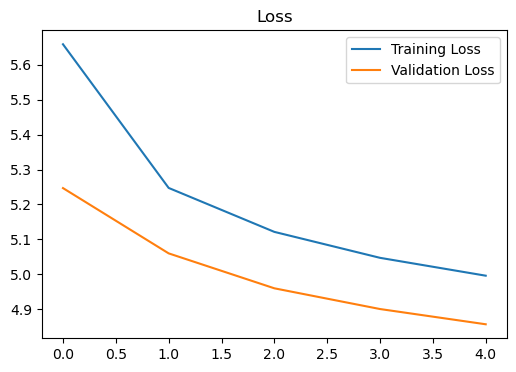

In [23]:
plt.figure(figsize=(6, 4))
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨**Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)**🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.